#### When we have the probability distribution of two signals of overlapping on each other as illustrated in fig.1, to accurately obtain the corresponding frequencies(or any physical quantity) of the each signal is not possible in such cases. In the model we use Bayes theorem and attributes of central limit theorem to obtain the number iterations required to achieve a clear distinguish of probability distribution between two signals. 


 # signalsprobabilities1 - Demo 

signalsprobabilities1.py - helps to identify if the number of iterations performed for a given standard deviation is sufficiently enough to have clear and distinguished probability distribution between the two signals. 

## Example1:

### Inputs 

signal1 = [Signal 1],  signal2 = [Signal 2] 

signal1mean = mean of signal 1, signal2mean = mean of signal 2

std = ( ) - standard deviation of your signals,

size = ( ) -  number of iterations you have performed. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from scipy.constants import *
from scipy.stats import norm
from scipy.special import softmax

In [2]:
signal1mean = 2.2e-09
signal2mean = 3.2e-09

#standard devation of the two signals
std = 6.2e-09

#No of iterations performed
size = 20

#Generating the two signals with the above signal-mean's and standard devation
signal1 = np.random.normal(loc=signal1mean, scale= std, size=size)
signal2 = np.random.normal(loc=signal2mean, scale = std, size=size)

In [3]:
def measurements_of_signal(signal1, signal2, signal1mean, signal2mean, std, size):    #std: standard devation
    probability1_measurment_signal_1 = []
    probability1_measurment_signal_2 = []
    probability2_measurment_signal_1 = []
    probability2_measurment_signal_2 = []
    
    s1, s2, p1, p2 = 0, 0, 0, 0
    

    # log(p(v=signal1|Si))
    for k in range(len(signal1)):
        s1 += -((signal1[k]- signal1mean)**2)/(2*(std**2))
            
    
        
    # log(p(v=signal2|Si))
    for l in range(len(signal1)):
        s2 += -((signal1[l] - signal2mean)**2)/(2*(std**2))
            

    p1, p2 = softmax([s1, s2])                              #softmax is used to normalize the results.
    probability1_measurment_signal_1.append(p1)
    probability2_measurment_signal_1.append(p2)
        
    
        
    s1, s2, p1, p2 = 0, 0, 0, 0
    # log(p(v=signal1|Si))
    for k in range(len(signal2)):
        s1 += -((signal2[k]- signal1mean)**2)/(2*(std**2))
            
    
        
    # log(p(v=signal2|Si))
    for l in range(len(signal2)):
        s2 += -((signal2[l] - signal2mean)**2)/(2*(std**2))
        

    p1, p2 = softmax([s1, s2])
    probability1_measurment_signal_2.append(p1)
    probability2_measurment_signal_2.append(p2)
        
    return(probability1_measurment_signal_1, probability2_measurment_signal_1, 
           probability1_measurment_signal_2, probability2_measurment_signal_2)

In [4]:
probability1_measurment_signal_1, probability2_measurment_signal_1, probability1_measurment_signal_2, probability2_measurment_signal_2 = measurements_of_signal(signal1, signal2, signal1mean, signal2mean, std, size) 

In [5]:
def plotting_results(std, probability1_measurment_signal_1, probability2_measurment_signal_1, probability1_measurment_signal_2, probability2_measurment_signal_2):
    fig, axes = plt.subplots(ncols=2, figsize=(12,4))
    
    #plotting probability of signal 1 while measuring signal 1
    ax = axes[0]
    ax.plot(std,probability1_measurment_signal_1,  'o', color = 'b', label='probability of signal1')
    ax.plot(std,probability2_measurment_signal_1, 'o', color = 'k', label='probability of signal2')
    ax.set(title='Measurment of probability of signal 1', xlabel='Standard devation', ylabel='probability')
    ax.legend()
    
    
    #plotting probability of signal 2 while measuring signal 2
    ax = axes[1]
    ax.plot(std,probability1_measurment_signal_2,  'o', color = 'b', label='probability of signal1')
    ax.plot(std,probability2_measurment_signal_2, 'o', color = 'k', label='probability of signal2')
    ax.set(title='Measurment of probability of signal 2', xlabel='Standard devation', ylabel='probability')
    ax.legend()
    
    
    print(probability1_measurment_signal_1, probability2_measurment_signal_1, probability1_measurment_signal_2, probability2_measurment_signal_2)

[0.4463830750598302] [0.5536169249401698] [0.6743335417497295] [0.3256664582502705]


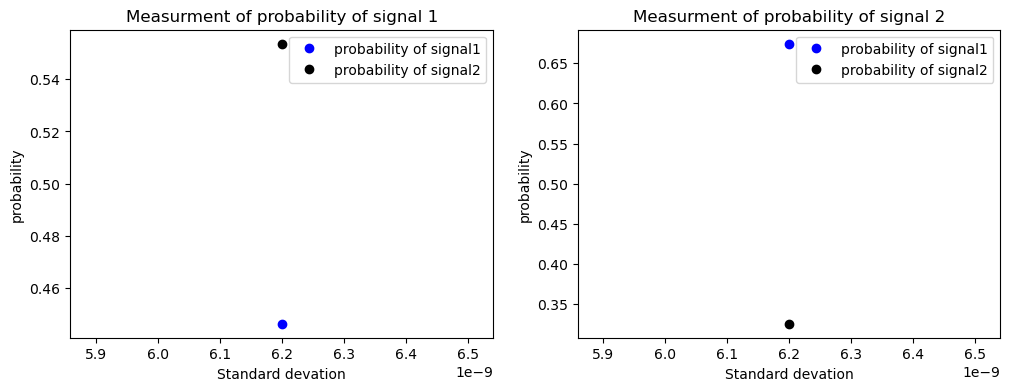

In [6]:
plotting_results(std, probability1_measurment_signal_1, probability2_measurment_signal_1, probability1_measurment_signal_2, probability2_measurment_signal_2)

For the given signals, with standard devation of 6.2e-09 and number of iterations = 20, 

using signalsprobabilities1.py we conclude that, 

'the probability of obtaining a signal - 1, while measuring for signal - 1' is less than 1.

and 

'the probability of obtaining a signal - 2, while measuring for signal - 2' is also less than 1. 

This indeed tells us that the number iterations performed are not sufficient to differentiate the two signals.

signalsprobabilities2.py - helps to identify number of iterations required to have clear and distinguished probability distribution between the two signals for given standard deviation(or even given set of standard deviations).

## Example:

### Inputs 

signal1mean = mean of signal 1, signal2mean = mean of signal 2

std = [ ] - standard deviations of your signals. (Note: if you want to perform for only one standard deviation, even then provide that single standard deviation value in an array.)

iterations = [ ] - iterations  e.g. iterations = np.arange(1, 3000, 100). #Note: try to provide a large range of iterations values.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from scipy.constants import *
from scipy.stats import norm
from scipy.special import softmax

In [8]:
std = [6.2e-09]
iterations = np.arange(1, 3000, 100)

In [9]:
def iterations_required(iterations, std, signal1mean, signal2mean):
    
    measurments_probability1_signal_1 = {}
    num_of_iterations_for_prob1_signal1 =[]
    measurments_probability2_signal_2 = {}
    num_of_iterations_for_prob2_signal2 =[]
    for j in range(len(std)):
        for i in range(len(iterations)):
            s1, s2, p1, p2 = 0, 0, 0, 0
            probability1_measurment_signal_1 = [] 
            signal1 = np.random.normal(loc=signal1mean, scale= std[j], size=iterations[i])
            signal2 = np.random.normal(loc=signal2mean, scale = std[j], size=iterations[i])
    

            # log(p(v=signal1|Si))
            for k in range(len(signal1)):
                s1 += -((signal1[k]- signal1mean)**2)/(2*(std[j]**2))
            
    
        
            # log(p(v=signal2|Si))
            for l in range(len(signal1)):
                s2 += -((signal1[l] - signal2mean)**2)/(2*(std[j]**2))

            p1, p2 = softmax([s1, s2])
        
            probability1_measurment_signal_1.append(p1)
            f = 'prob1_meas_sig_1_std_'+str(std[j])+'_itert_'+str(iterations[i])
            measurments_probability1_signal_1[f] = probability1_measurment_signal_1
        
        
            if p1 == 1:
                num_of_iterations_for_prob1_signal1.append(iterations[i])
                break
                
                
    for j in range(len(std)):         
        for i in range(len(iterations)):
            signal1 = np.random.normal(loc=signal1mean, scale= std[j], size=iterations[i])
            signal2 = np.random.normal(loc=signal2mean, scale = std[j], size=iterations[i])
            s1, s2, p1, p2 = 0, 0, 0, 0
            probability2_measurment_signal_2 = [] 
            
            
            # log(p(v=signal1|Si))
            for k in range(len(signal1)):
                s1 += -((signal2[k]- signal1mean)**2)/(2*(std[j]**2))
            
    
        
            # log(p(v=signal2|Si))
            for l in range(len(signal1)):
                s2 += -((signal2[l] - signal2mean)**2)/(2*(std[j]**2))


            p1, p2 = softmax([s1, s2])
            probability2_measurment_signal_2.append(p2)
            f = 'prob2_meas_sig_2_std_'+str(std[j])+'_itert_'+str(iterations[i])
            measurments_probability2_signal_2[f] = probability2_measurment_signal_2
        
    
        
            if p2 == 1:
                num_of_iterations_for_prob2_signal2.append(iterations[i])
                break
    return(num_of_iterations_for_prob1_signal1, num_of_iterations_for_prob2_signal2, 
           measurments_probability1_signal_1, measurments_probability2_signal_2)


In [10]:
num_of_iterations_for_prob1_signal1, num_of_iterations_for_prob2_signal2, measurments_probability1_signal_1, measurments_probability2_signal_2 = iterations_required(iterations, std, signal1mean, signal2mean) 

In [11]:
def plotting_iterations_results(std, num_of_iterations_for_prob1_signal1, num_of_iterations_for_prob2_signal2):
    fig, axes = plt.subplots(ncols=2, figsize=(12,4))
    
    #plotting number of iterations required to achieve probability of signal-1 = 1, for respective standard devations
    ax = axes[0]
    ax.plot(std, num_of_iterations_for_prob1_signal1, 'o', label='probability of measuring signal1 = 1')
    ax.set(title='No. of iterations required to achieve P(Signal1) = 1', 
           xlabel='Standard devation', ylabel='Iterations')
    ax.legend()
    
    
    
    #plotting number of iterations required to achieve probability of signal-2 = 1, for respective standard devations
    ax = axes[1]
    ax.plot(std, num_of_iterations_for_prob2_signal2, 'o', label='probability of measuring signal2 = 1')
    ax.set(title='No. of iterations required to achieve P(Signal2) = 1', 
           xlabel='Standard devation', ylabel='Iterations')
    ax.legend()    
    
    
    print(num_of_iterations_for_prob1_signal1, num_of_iterations_for_prob2_signal2)



[2501] [2201]


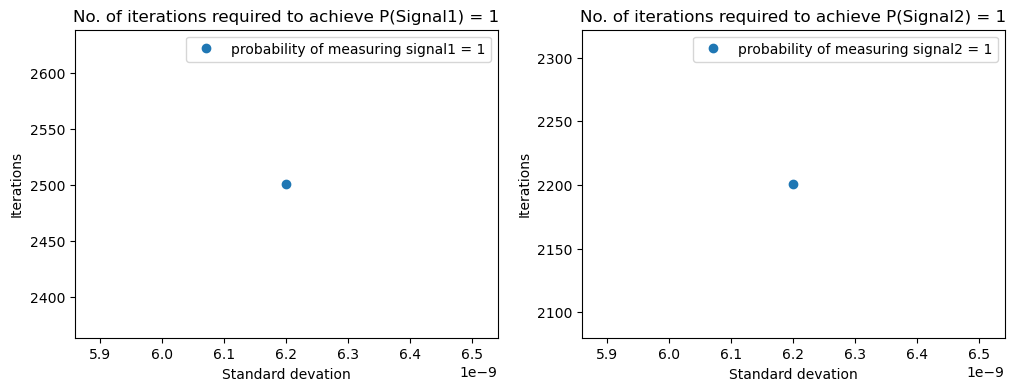

In [12]:
plotting_iterations_results(std, num_of_iterations_for_prob1_signal1, num_of_iterations_for_prob2_signal2)

## Example 2: for a given range of standard devations

### Inputs 

In [13]:
std = []
for i in range(9):
    std.append(1.2e-09 + i*0.4e-09)
iterations = np.arange(1, 3000, 100)

In [14]:
num_of_iterations_for_prob1_signal1, num_of_iterations_for_prob2_signal2, measurments_probability1_signal_1, measurments_probability2_signal_2 = iterations_required(iterations, std, signal1mean, signal2mean) 

[201, 201, 301, 401, 501, 701, 1001, 1201, 1301] [201, 301, 401, 401, 701, 1001, 701, 1401, 1601]


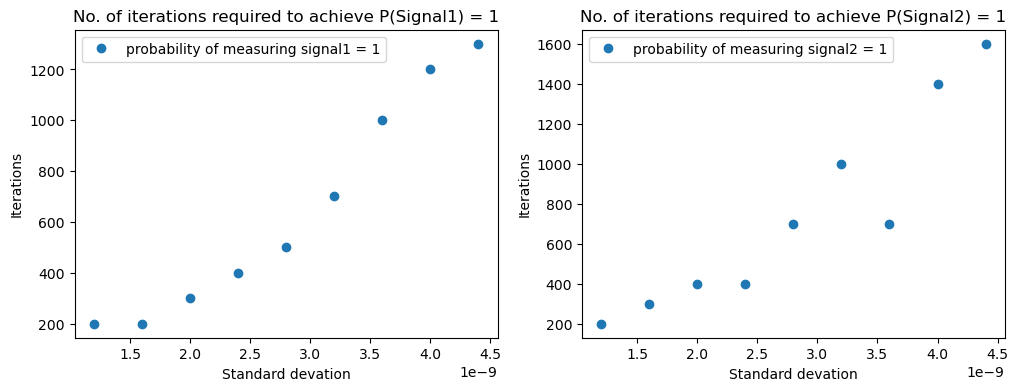

In [15]:
plotting_iterations_results(std, num_of_iterations_for_prob1_signal1, num_of_iterations_for_prob2_signal2)